In [101]:
from segysak.segy import segy_loader,segy_header_scrape
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2 as cv
import pickle
import os

In [128]:
def get_df_from_dat(path):
    fault_list = [fault for fault in os.listdir(path) if fault.endswith('.dat')]

    df = pd.DataFrame()

    for fault in fault_list:
        df_to_concat = pd.read_csv(f'{path}\{fault}', delim_whitespace=True, header=None)
        df_to_concat.columns = ['Name', 'Inline', 'Xline', 'Time', 'idk', 'n']

        i_or_x = 'iline' if fault.split('_')[1] == 'Inline' else 'xline'

        df_to_concat['Line'] = [i_or_x for _ in range(len(df_to_concat))]

        df = pd.concat([df, df_to_concat])

    df['Time'] /= 4
    df['Time'] = round(df['Time'])

    id = []
    count = -1
    for i in range(len(df)):
        if df['n'].iloc[i] == 0:
            count += 1
        id += [count]
    df['ID'] = id

    df.drop(['Name', 'idk', 'n'], axis=1, inplace=True)

    df = df[df.columns[::-1]]

    df.set_index('ID', inplace=True)

    return df

def get_mask_from_dat(file_path):
    df = pd.read_csv(file_path, delim_whitespace=True)

In [177]:
path = r'C:\Users\jpgom\Documents\Jão\UFBA\IC\Code\Vini'
path1 = r'C:\Users\jpgom\Documents\Jão\git\facies_classification'
file_path = r'C:\Users\jpgom\Documents\Jão\git\facies_classification\Faults.dat'
cube_path = r'C:\Users\jpgom\Documents\Jão\UFBA\IC\Code\Seismic_data_w_null.sgy'

df = pd.read_csv(file_path, delim_whitespace=True)

df

,ID,Line,Time,Xline,Inline
0,0,iline,408.0,581,310
1,0,iline,421.0,584,310
2,0,iline,439.0,588,310
3,0,iline,456.0,591,310
4,1,iline,406.0,630,310
...,...,...,...,...,...
250,62,xline,311.0,940,656
251,62,xline,342.0,940,660
252,63,xline,284.0,940,379
253,63,xline,293.0,940,375


In [135]:
# cube = segy_loader(cube_path)

100%|██████████| 619k/619k [01:26<00:00, 7.17k traces/s]


Loading as 3D
Fast direction is INLINE_3D


Converting SEGY: 100%|██████████| 619k/619k [02:42<00:00, 3.82k traces/s]  


100 300 4.0


Text(0, 0.5, 'Time')

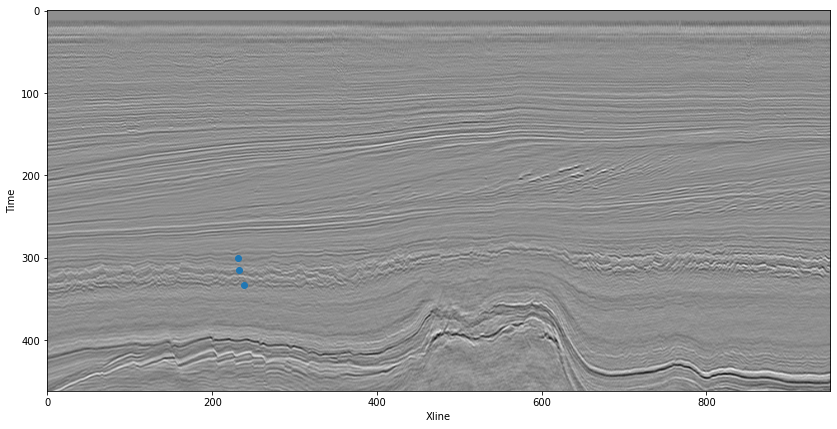

In [184]:
iline0 = cube.iline.data[0]
xline0 = cube.xline.data[0]
t0 = cube.twt.data[0]

print(iline0, xline0, t0)

id = 2
i_or_x = df[df['ID'] == id]['Line'].unique()[0]

plt.figure(figsize=(15,7))

if i_or_x == 'iline':
    line_number = df[df['ID'] == id]['Inline'].unique()[0]
    plt.imshow(cube.isel(iline=line_number).data.T, cmap='gray')
    plt.scatter(df[df['ID'] == id]['Xline'] - xline0, df[df['ID'] == id]['Time'])
else:
    line_number = df[df['ID'] == id]['Xline'].unique()[0]
    plt.imshow(cube.isel(xline=line_number).data.T, cmap='gray')
    plt.scatter(df[df['ID'] == id]['Inline'] - iline0, df[df['ID'] == id]['Time'])

plt.xlabel('Xline')
plt.ylabel('Time')